## Aim:
Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing, pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank0 etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset Description : Insurance Cost Dataset 

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [2]:
df = pd.read_csv("../input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Descriptive Statistics
Lets briefly understand our numerical variables using Amount and Frequency Statistics

In [4]:
## Total Datapoints
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [5]:
## Central Tendency Statistics 
# mean
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [6]:
## median
df.median()

## Mean and median are same for age and bmi but charges are different that means there are outlier and skewness

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [7]:
## Dispersion Statistics
df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object

In [8]:
df.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [9]:
df.var()

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [10]:
df.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


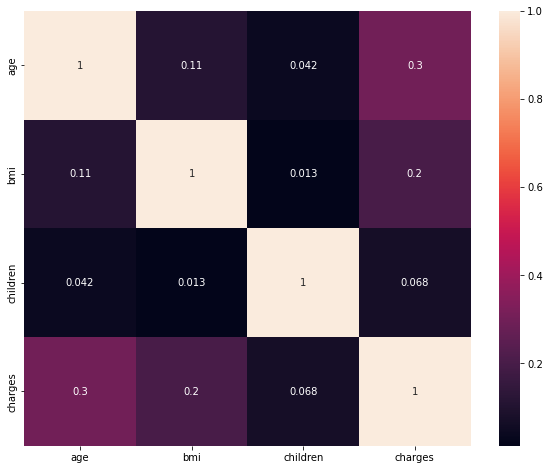

In [12]:
## Correation of Data

correlation_data = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

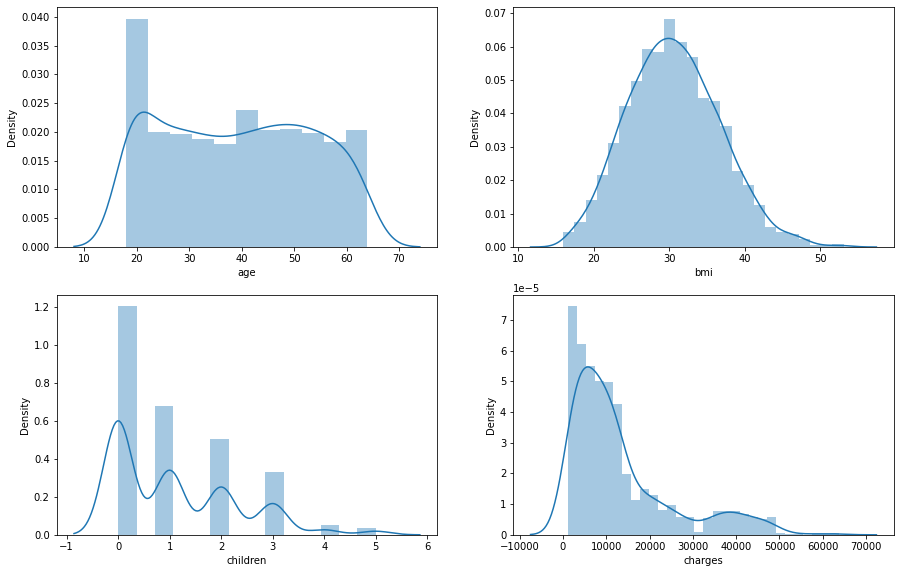

In [13]:
## Visual Checks

plt.figure(figsize=(15,15))
col = ['age', 'bmi', 'children','charges']
for i in range(0,len(col)):
    plt.subplot(len(col)//2+1,2,i+1)
    sns.distplot(df[col[i]]);
    plt.xlabel(col[i])

## Inference
- BMI is normally distributed
- Children discrete value
- Charges as infered above is not normal with outiers and skewed

## Normality Test through statistics
### Shapiro Wilk test

- The Shapiro Wilk test is the most powerful test when testing for a normal distribution. It has been developed specifically for the normal distribution and it cannot be used for testing against other distributions like for example the KS test. The Shapiro Wilk test is the most powerful test when testing for a normal distribution.
- Interpretation
  - If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
  - If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution
  
 <br> 
- Null Hypothesis : Data is normally distributes
- Alternate Hypotheisis : Data is not normally distributed

In [14]:
def shapiro_wilk_test(df: pd.DataFrame, cols: list, alpha=0.05):
    for col in cols:
        _,p = stats.shapiro(df[col])
        if p <= alpha:
            print(f"\nRejected H0 under significance level {alpha}\n{col} doesn't seems to be normally distributed with pvalue = {p}")
        else:
            print(f"\nFail to reject H0 due to lack of evidence under significance level {alpha}\n{col} seem to be normally distributed with pvalue = {p}")

In [15]:
numerical_cols =  ['age', 'bmi', 'children','charges']
shapiro_wilk_test(df, numerical_cols)


Rejected H0 under significance level 0.05
age doesn't seems to be normally distributed with pvalue = 5.687479624670986e-22

Rejected H0 under significance level 0.05
bmi doesn't seems to be normally distributed with pvalue = 2.609841976664029e-05

Rejected H0 under significance level 0.05
children doesn't seems to be normally distributed with pvalue = 5.066361280494088e-36

Rejected H0 under significance level 0.05
charges doesn't seems to be normally distributed with pvalue = 1.150477698013898e-36


## Normlity Check using qqplot
- A Q-Q plot, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution.

- In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution. If the data is normally distributed, the points in a Q-Q plot will lie on a straight diagonal line. Conversely, the more the points in the plot deviate significantly from a straight diagonal line, the less likely the set of data follows a normal distribution.



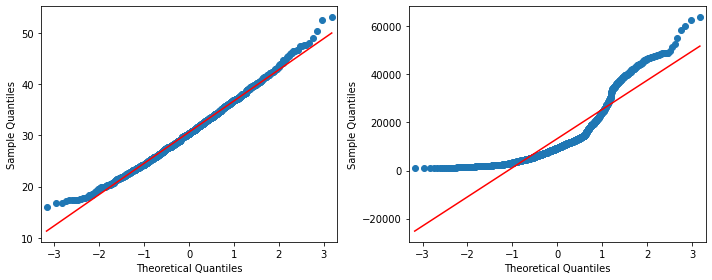

In [16]:
from statsmodels.graphics.gofplots import qqplot

fig = plt.figure(1, (10, 4))

ax = plt.subplot(1,2,1)
qqplot(df["bmi"], line= 's',ax=ax);
plt.tight_layout()

ax = plt.subplot(1,2,2)
qqplot(df["charges"], line= 's',ax=ax);
plt.tight_layout()

plt.show();


## From this we can infer that bmi is normal and charge is not but the tail is why SW is rejecting null hypothesis

## Hypothesis Testing 
- **To check if the insurance cost of smoker is greater than a non smoker**

### Step 1: Define null and alternative hypothesis

H0: insurance cost of smoker is greater as than a non smoker

Ha: insurance cost of smoker is not greater than a non smoker

### Step 2: Decide the significance level: α = 0.05

### Step 3: Identify the test: z - test

The z-test is a hypothesis test in which the z-statistic follows a normal distribution. The z-test is best used for greater-than-30 samples because, under the central limit theorem, as the number of samples gets larger, the samples are considered to be approximately normally distributed.

A z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large. A z-test is a hypothesis test in which the z-statistic follows a normal distribution. 
A z-statistic, or z-score, is a number representing the result from the z-test.
Z-tests are closely related to t-tests, but t-tests are best performed when an experiment has a small sample size.
Z-tests assume the standard deviation is known, while t-tests assume it is unknown.

### Step 4: Calculate the test-statistics and p-value

In [17]:
df_male = df[df['sex']=='male']
df_female = df[df['sex']=='female']
charges_female = (df_female.charges)
charges_male = (df_male.charges)

alpha = 0.05

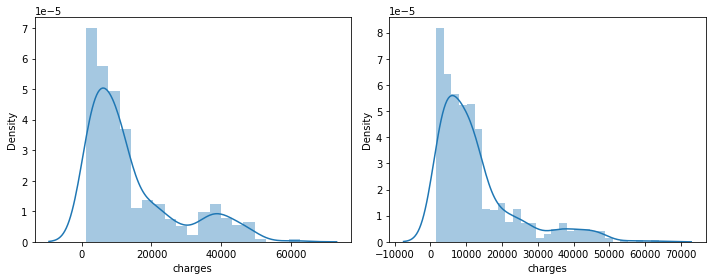

In [18]:
from statsmodels.graphics.gofplots import qqplot

fig = plt.figure(1, (10, 4))

ax = plt.subplot(1,2,1)
sns.distplot(charges_male,ax=ax);
plt.tight_layout()

ax = plt.subplot(1,2,2)
sns.distplot(charges_female,ax=ax);
plt.tight_layout()

plt.show();


Mean charges for Males = 13956.751177721893
Mean charges for Females = 12569.578843835347


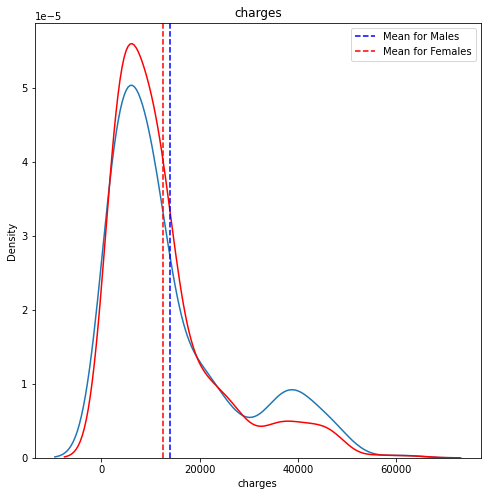

In [19]:
plt.figure(figsize=(8,8))
sns.distplot(charges_male, hist=False);
sns.distplot(charges_female, hist=False, color='red');
plt.axvline(charges_male.mean(),color='blue',linestyle='--',label='Mean for Males');
plt.axvline(charges_female.mean(),color='red',linestyle='--',label='Mean for Females');
plt.title('charges');
plt.xlabel('charges');
plt.legend();
print('Mean charges for Males =',charges_male.mean())
print('Mean charges for Females =',charges_female.mean())

In [20]:
from statsmodels.stats import weightstats as stests
ztest ,p_value = stests.ztest(charges_male,charges_female)

print(float(p_value))
if p_value<alpha:
    print("Null hyphothesis rejected , insurance cost of smoker is not greater than a non smoker")
else:
    print("Null hyphothesis accepted , insurance cost of smoker is greater than a non smoker")

0.03594521741682005
Null hyphothesis rejected , insurance cost of smoker is not greater than a non smoker


In [21]:
alpha = 0.025
from statsmodels.stats import weightstats as stests
ztest ,p_value = stests.ztest(charges_male,charges_female)

print(float(p_value))
if p_value<alpha:
    print("Null hyphothesis rejected , insurance cost of smoker is not greater than a non smoker")
else:
    print("Null hyphothesis accepted , insurance cost of smoker is greater than a non smoker")

0.03594521741682005
Null hyphothesis accepted , insurance cost of smoker is greater than a non smoker


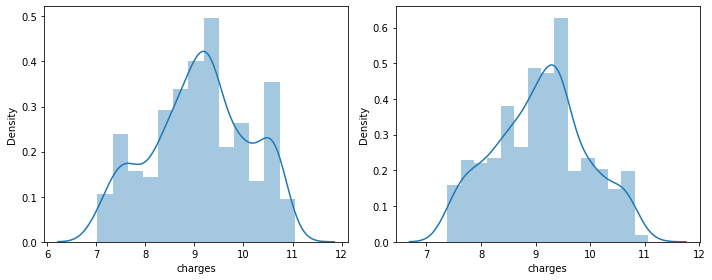

Mean charges for Males = 9.103781557913017
Mean charges for Females = 9.093427563173927


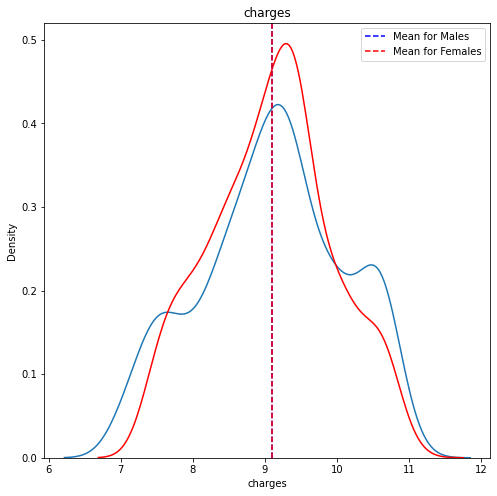

In [22]:
## Since normal distribution expectation lets run on log transform

df_male = df[df['sex']=='male']
df_female = df[df['sex']=='female']
charges_female = np.log(df_female.charges)
charges_male = np.log(df_male.charges)

from statsmodels.graphics.gofplots import qqplot

fig = plt.figure(1, (10, 4))

ax = plt.subplot(1,2,1)
sns.distplot(charges_male,ax=ax);
plt.tight_layout()

ax = plt.subplot(1,2,2)
sns.distplot(charges_female,ax=ax);
plt.tight_layout()

plt.show();


### Taking log for normal distribution approximation as charges is not normally distributed 

plt.figure(figsize=(8,8))
sns.distplot(charges_male, hist=False);
sns.distplot(charges_female, hist=False, color='red');
plt.axvline(charges_male.mean(),color='blue',linestyle='--',label='Mean for Males');
plt.axvline(charges_female.mean(),color='red',linestyle='--',label='Mean for Females');
plt.title('charges');
plt.xlabel('charges');
plt.legend();
print('Mean charges for Males =',charges_male.mean())
print('Mean charges for Females =',charges_female.mean())


In [23]:
from statsmodels.stats import weightstats as stests
ztest ,p_value = stests.ztest(charges_male,charges_female)

alpha = 0.05

print(float(p_value))
if p_value<alpha:
    print("Null hyphothesis rejected , insurance cost of smoker is not greater than a non smoker")
else:
    print("Null hyphothesis accepted , insurance cost of smoker is greater than a non smoker")

0.8369039256742391
Null hyphothesis accepted , insurance cost of smoker is greater than a non smoker


## Conclusion
- I was able to check normality of data using shapiro wilk test which gave bmi as not normal distribution but was then verified visually using qqplot
- I had a hypothesis which is kind of fact that the insurance cost of smoker is greater than a non smoker. I was able to accept this hypotheis after i ran z-test on it with a sigificance level of 5% and was able to verify it with the z-score and accepted the hpothesis as truth 